# Customer Service Requests Analysis

## Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
### Domain: Customer Service

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


In [2]:
#Reading the data from csv file into a dataframe
df_n=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

C:\Users\Amitabh Das\anaconda3\envs\CV\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Understanding the data

In [3]:
#Reading the first five records from the dataframe
df_n.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
#Shape of the dataframe
df_n.shape

(300698, 53)

In [5]:
df_n.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [6]:
#Check if the columns have missing values
df_n.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [7]:
df_n['Closed Date']

0                  01-01-16 0:55
1                  01-01-16 1:26
2                  01-01-16 4:51
3                  01-01-16 7:43
4                  01-01-16 3:24
                   ...          
300693                       NaN
300694    03/29/2015 02:33:59 AM
300695    03/29/2015 03:40:20 AM
300696    03/29/2015 04:38:35 AM
300697    03/29/2015 04:41:50 AM
Name: Closed Date, Length: 300698, dtype: object

In [8]:
#Check the datatypes of the columns in the dataset
df_n.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [9]:
#Importing datatime library
import datetime as dt
from datetime import datetime

In [10]:
df_n['Closed Date']=pd.to_datetime(df_n['Closed Date'])
df_n['Closed Date'].dtype

dtype('<M8[ns]')

In [11]:
df_n['Created Date']=pd.to_datetime(df_n['Created Date'])
df_n['Created Date'].dtype

dtype('<M8[ns]')

In [12]:
#Created new column as request closing time
df_n['Request_Closing_Time'] = df_n['Closed Date'] - df_n['Created Date']
df_n['Request_Closing_Time'].head()

0   00:55:15
1   01:26:16
2   04:51:31
3   07:45:14
4   03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [13]:
#Checking the status of the complaints
df_n['Status'].value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

## Major Insights into the NYC Data

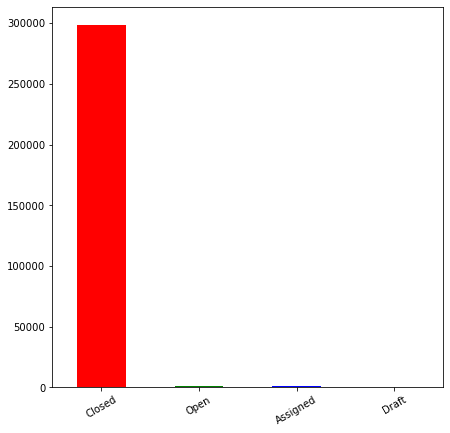

In [14]:
#Plotting status of complaints in bar graph
index=np.arange(len(df_n['Status'].unique()))
df_n['Status'].value_counts().plot(kind='bar',color=list('rgb'), alpha=1,figsize=(7,7))
plt.xticks(index, df_n['Status'].unique(), fontsize=10, rotation=30)
plt.show()

In [15]:
# Counting the no.of complaints from each city
df_n['City'].value_counts()

BROOKLYN               98307
NEW YORK               65994
BRONX                  40702
STATEN ISLAND          12343
JAMAICA                 7296
ASTORIA                 6330
FLUSHING                5971
RIDGEWOOD               5163
CORONA                  4295
WOODSIDE                3544
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2734
ELMHURST                2673
WOODHAVEN               2464
MASPETH                 2462
LONG ISLAND CITY        2437
SOUTH OZONE PARK        2173
RICHMOND HILL           1904
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
JACKSON HEIGHTS         1689
FOREST HILLS            1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             931
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

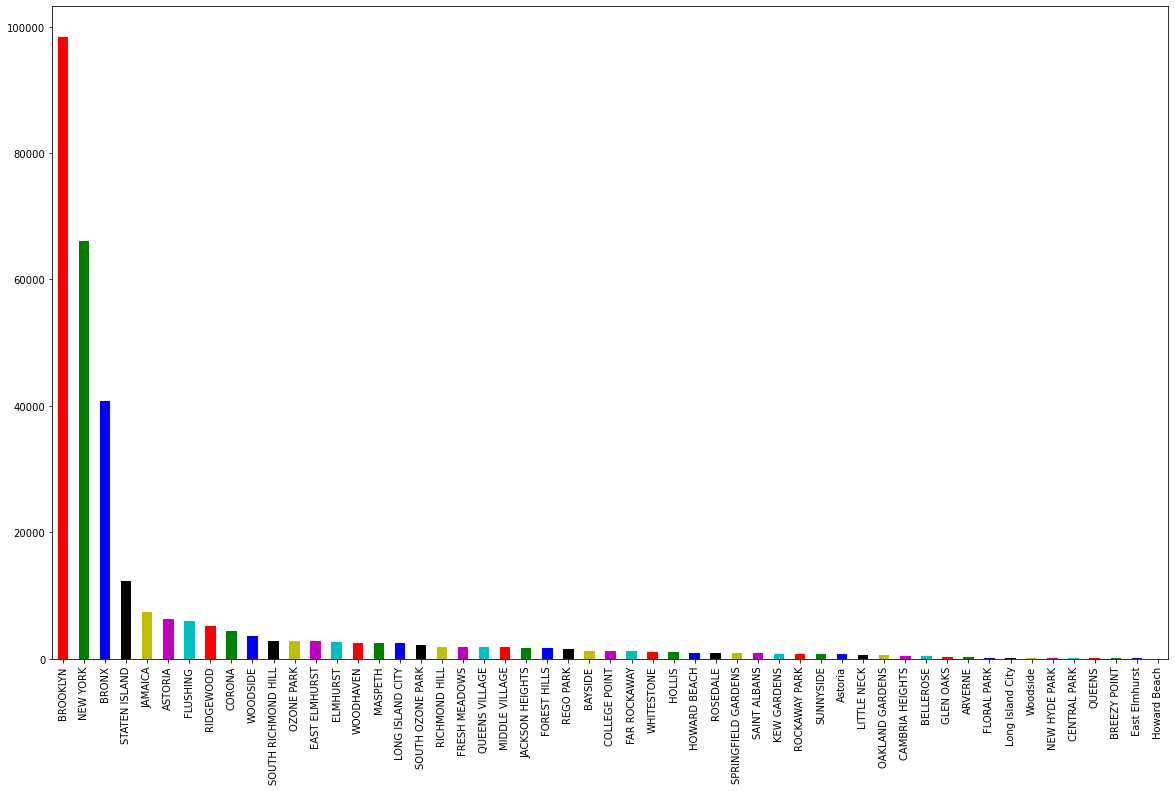

In [16]:
# Plotting the no.of complaints from each city
df_n['City'].value_counts().plot(kind='bar', color=list('rgbkymc'), alpha=1,figsize=(20,12))

In [17]:
df_n['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

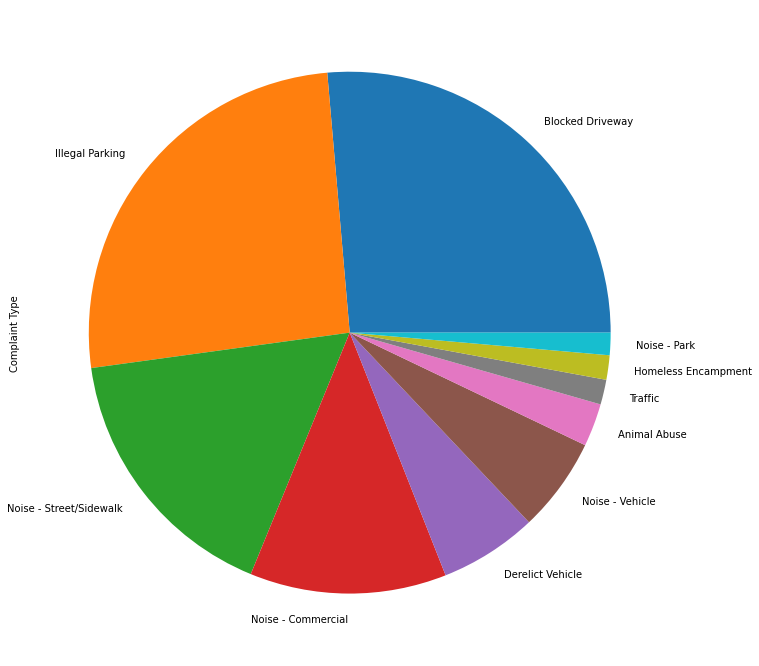

In [18]:
df_n['Complaint Type'].value_counts().head(10).plot(kind='pie', figsize=(20,12))

In [19]:
monthSeries = pd.Series({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
print(monthSeries)
print(monthSeries[12])

1     Jan
2     Feb
3     Mar
4     Apr
5     May
6     Jun
7     Jul
8     Aug
9     Sep
10    Oct
11    Nov
12    Dec
dtype: object
Dec


In [20]:
df_n['Created Date'].head()

0   2015-12-31 23:59:45
1   2015-12-31 23:59:44
2   2015-12-31 23:59:29
3   2015-12-31 23:57:46
4   2015-12-31 23:56:58
Name: Created Date, dtype: datetime64[ns]

In [21]:
def ctmonth(coldate):
    d=str(coldate)
    datee = datetime.strptime(d, "%Y-%m-%d %H:%M:%S")
    return monthSeries[datee.month]

In [22]:
df_n['Created_Month'] = df_n['Created Date'].apply(ctmonth)
df_n['Created_Month']

0         Dec
1         Dec
2         Dec
3         Dec
4         Dec
         ... 
300693    Mar
300694    Mar
300695    Mar
300696    Mar
300697    Mar
Name: Created_Month, Length: 300698, dtype: object

In [23]:
df_n.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Created_Month
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15,Dec
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16,Dec
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31,Dec
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14,Dec
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02,Dec


In [24]:
df_n['Created_Month'].value_counts()

May    36437
Sep    35427
Jun    35315
Aug    34956
Jul    34888
Oct    32605
Nov    30773
Dec    30521
Apr    27305
Mar     2471
Name: Created_Month, dtype: int64

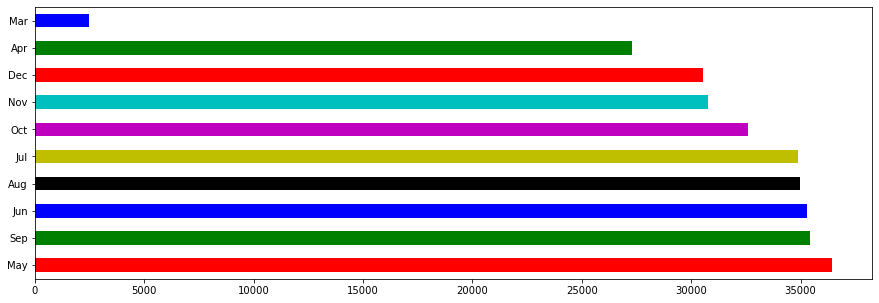

In [25]:
df_n['Created_Month'].value_counts().plot(kind="barh", color=list('rgbkymc'), alpha=1, figsize=(15,5))
plt.show()

## Arranging the complaint types based on average request closing time grouped by City

In [26]:
df_n['City'].isnull().sum()

2614

In [27]:
df_n['City'].fillna('Not Available', inplace=True)
df_n['City']

0              NEW YORK
1               ASTORIA
2                 BRONX
3                 BRONX
4              ELMHURST
              ...      
300693    Not Available
300694    RICHMOND HILL
300695         BROOKLYN
300696            BRONX
300697         NEW YORK
Name: City, Length: 300698, dtype: object

In [28]:
dgroup=df_n.groupby(['City', 'Complaint Type'])
dgroup.size()

City      Complaint Type         
ARVERNE   Animal Abuse                38
          Blocked Driveway            35
          Derelict Vehicle            27
          Disorderly Youth             2
          Drinking                     1
                                    ... 
Woodside  Blocked Driveway            11
          Derelict Vehicle             2
          Illegal Parking            100
          Noise - Commercial           2
          Noise - Street/Sidewalk      5
Length: 782, dtype: int64

In [29]:
df_n['Request_Closing_Time']

0        00:55:15
1        01:26:16
2        04:51:31
3        07:45:14
4        03:27:02
           ...   
300693        NaT
300694   02:00:31
300695   03:07:17
300696   04:05:33
300697   04:08:49
Name: Request_Closing_Time, Length: 300698, dtype: timedelta64[ns]

In [30]:
# Converting the Requesting closing time in hours
def converttohours(t):
    days = t.days
    hours = round(t.seconds/3600, 2) 
    result = (days * 24) + hours
    return result

In [31]:
df_n['Request_Closing_In_Hr'] = df_n['Request_Closing_Time'].apply(converttohours)
df_n['Request_Closing_In_Hr'].head()

0    0.92
1    1.44
2    4.86
3    7.75
4    3.45
Name: Request_Closing_In_Hr, dtype: float64

In [32]:
dmean = dgroup.mean()['Request_Closing_In_Hr']
dmean.isnull().sum()

4

In [33]:
dgrouped = df_n.groupby(['City','Complaint Type']).agg({'Request_Closing_In_Hr': 'mean'})
dgrouped

Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[782 rows x 1 columns]

In [34]:
dgrouped[dgrouped['Request_Closing_In_Hr'].isnull()]

Request_Closing_In_Hr
City          Complaint Type                                 
Not Available Ferry Complaint                             NaN
              Noise - House of Worship                    NaN
              Panhandling                                 NaN
              Posting Advertisement                       NaN

In [35]:
print(dgrouped)

                                  Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[782 rows x 1 columns]


In [36]:
df_g_wna = dgrouped.dropna()

In [37]:
df_g_wna.isnull().sum()

Request_Closing_In_Hr    0
dtype: int64

In [38]:
print(df_g_wna)

                                  Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[778 rows x 1 columns]


In [39]:
data_sorted= df_g_wna.sort_values(['City', 'Request_Closing_In_Hr'])
data_sorted

Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Drinking                              0.240000
         Vending                               0.480000
         Urinating in Public                   0.690000
         Panhandling                           1.030000
         Noise - Park                          1.285000
...                                                 ...
Woodside Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Blocked Driveway                      6.405455

[778 rows x 1 columns]

## Statistical Testing

In [40]:
import scipy.stats as stats
from math import sqrt

In [41]:
complains=df_n['Complaint Type'].value_counts()
complains

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [42]:
c=complains.head()
c

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Name: Complaint Type, dtype: int64

In [43]:
c_names=c.index
c_names

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

In [44]:
sample_data = df_n.loc[df_n['Complaint Type'].isin(c_names), ['Complaint Type', 'Request_Closing_In_Hr']]
sample_data.head()

,Complaint Type,Request_Closing_In_Hr
0,Noise - Street/Sidewalk,0.92
1,Blocked Driveway,1.44
2,Blocked Driveway,4.86
3,Illegal Parking,7.75
4,Illegal Parking,3.45


In [45]:
sample_data.shape

(254312, 2)

In [46]:
sample_data.isnull().sum()

Complaint Type              0
Request_Closing_In_Hr    2059
dtype: int64

In [47]:
sample_data.dropna(how='any', inplace=True)
sample_data.isnull().sum()

Complaint Type           0
Request_Closing_In_Hr    0
dtype: int64

In [48]:
sample_data.shape

(252253, 2)

In [49]:
s1 = sample_data[sample_data['Complaint Type'] == c_names[0]].Request_Closing_In_Hr
s1.head()

1     1.44
2     4.86
7     1.80
9     1.38
10    7.80
Name: Request_Closing_In_Hr, dtype: float64

In [50]:
s2 = sample_data[sample_data['Complaint Type'] == c_names[1]].Request_Closing_In_Hr
s2.head()

3    7.75
4    3.45
5    1.89
6    1.96
8    8.55
Name: Request_Closing_In_Hr, dtype: float64

In [51]:
s3 = sample_data[sample_data['Complaint Type'] == c_names[2]].Request_Closing_In_Hr
s3.head()

0     0.92
12    2.48
19    0.78
38    0.49
54    1.50
Name: Request_Closing_In_Hr, dtype: float64

In [52]:
s4 = sample_data[sample_data['Complaint Type'] == c_names[3]].Request_Closing_In_Hr
s4.head()

17    0.85
18    2.93
22    1.26
29    2.50
30    1.99
Name: Request_Closing_In_Hr, dtype: float64

In [53]:
s5 = sample_data[sample_data['Complaint Type'] == c_names[4]].Request_Closing_In_Hr
s5.head()

14     10.49
151     3.95
255     1.36
256     4.13
295     0.75
Name: Request_Closing_In_Hr, dtype: float64

In [54]:
print(s1.isnull().sum())
print(s2.isnull().sum())
print(s3.isnull().sum())
print(s4.isnull().sum())
print(s5.isnull().sum())

0
0
0
0
0


In [55]:
stats.f_oneway(s1, s2, s3, s4, s5)

F_onewayResult(statistic=1799.598683238952, pvalue=0.0)

### Since the p-value is less than 0.05, we reject the null hypothesis thus confirming that the average response time is not the same for all complaint types.